In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.cluster import KMeans

# from ipywidgets import interact

In [30]:
import json
output_file_path = "/Users/nguyenbathiem/Documents/GitHub/StockBot/StockBot/data/cleaned_splitted_news.json"
with open(output_file_path, "r") as file:
    data = json.load(file)
content = [item['Splitted Content'] for item in data]
content[:5]

['Các vụ vỡ nợ trái phiếu doanh nghiệp đang tăng ở Thái Lan. Ngân hàng Trung ương tăng lãi suất đã làm tăng chi phí tài chính của doanh nghiệp và gây khó khăn cho một số tổ chức phát hành trong việc đảm bảo số tiền họ cần để trả nợ. Các tổ chức phát hành trái phiếu cũng đang gặp khó khăn bởi sự thận trọng ngày càng tăng của các nhà đầu tư đối với việc mua trái phiếu không được đảm bảo bằng tài sản thế chấp. Ông Kasem Prunratanamala, trưởng bộ phận nghiên cứu của CGS-CIMB Securities (Thái Lan), phát biểu: “Các vụ vỡ nợ trái phiếu gần đây của nhiều doanh nghiệp đã làm giảm lòng tin trên thị trường, dẫn đến giá trị giao dịch trái phiếu giảm”. Theo hiệp hội Thị trường Trái phiếu Thái Lan, 7 công ty niêm yết đã trễ thời hạn mua lại tính đến ngày 31/8. Tổng số nợ của 7 công ty này là 19 tỷ baht. Con số này nhiều hơn 6 vụ vỡ nợ với tổng trị giá 13,5 tỷ baht xảy ra trong giai đoạn 2016 - 2022.',
 'Khó khăn đang bao trùm nhiều tập đoàn Thái Lan, từ nhà phát triển bất động sản tới các công ty đi

In [4]:
from model_bkai import model
import numpy as np

# Use list comprehension to create a list of vectors
vectors = [model.encode(sentence) for sentence in content]

# Convert the list of vectors to a NumPy array
result_array = np.vstack(vectors)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
result_array
file_path = 'result_array.npy'
# Save the array to the file
np.save(file_path, result_array)

In [2]:

file_path = 'result_array.npy'

# Load the array from the file
loaded_array = np.load(file_path)

len(loaded_array)

2768

In [3]:
from sklearn.decomposition import PCA
# Perform PCA for dimensionality reduction
n_components = 3  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(loaded_array)
data_pca


array([[ 0.00999929, -0.21790928,  0.01684757],
       [-0.09182662, -1.1011945 , -0.2302408 ],
       [-0.09637236, -1.0287693 ,  0.14135817],
       ...,
       [ 1.2802783 ,  0.63483083,  0.6349148 ],
       [-0.1586342 ,  2.1479316 , -0.34232625],
       [ 0.00519699,  1.410292  , -0.6620827 ]], dtype=float32)

In [161]:
from sklearn.decomposition import TruncatedSVD
num_topics = 3  # Choose the number of topics (latent dimensions)
lsa = TruncatedSVD(n_components=num_topics)
data_lsa = lsa.fit_transform(loaded_array)
data_lsa

array([[ 2.1746705 , -0.0186966 , -0.31429395],
       [ 1.917846  ,  0.1334868 , -1.1229322 ],
       [ 1.8377686 ,  0.11680223, -1.0572217 ],
       ...,
       [ 3.1793833 ,  0.8260859 ,  0.47676176],
       [ 2.7769723 , -0.8151716 ,  1.8491694 ],
       [ 2.55189   , -0.43923703,  1.2482004 ]], dtype=float32)

In [40]:
from sklearn.manifold import TSNE

# Assuming 'X' is your high-dimensional data
tsne = TSNE(n_components=3)  # You can change n_components to 3 for 3D visualization
data_tsne = tsne.fit_transform(loaded_array)
data_tsne[:5]


/Users/nguyenbathiem/opt/anaconda3/envs/for_jupyter/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/nguyenbathiem/opt/anaconda3/envs/for_jupyter/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[ -4.6012416,  -9.0470495,   4.0999365],
       [ -4.0543885,  -8.215887 ,   4.3356576],
       [ -4.4181457,  -6.6969495,   5.254401 ],
       [-21.625284 ,  -4.0045295,  -1.4386798],
       [-12.297417 ,  -1.6008818,  -1.0527723]], dtype=float32)

In [162]:
import numpy as np
from sklearn.cluster import KMeans


# Generate some sample data (replace this with your own data)
# X = data_pca  # 3D data
# X = data_tsne  # 2D data
X = data_lsa
# Specify the number of clusters (you should choose an appropriate value)
n_clusters = 6

# Create a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add cluster labels to the original dataset
X_with_labels = np.column_stack((X, labels))

In [163]:
import plotly.express as px
# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    X_with_labels,
    x=0,  # X-axis corresponds to the first dimension
    y=1,  # Y-axis corresponds to the second dimension
    z=2,  # Z-axis corresponds to the third dimension
    color=3,  # Color data points by cluster labels
)
fig.update_traces(marker=dict(size=3))
# Customize the plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3',
    ),
    title=f'K-Means Clustering with {n_clusters} Clusters (3D)',
    width=1200,  
    height=1000,  
)

# Show the interactive plot
fig.show()


In [193]:
unique_labels = np.unique(kmeans_labels)
clusters = []
for label in unique_labels:
    # Find indices of data points belonging to the current cluster
    cluster_indices = np.where(kmeans_labels == label)[0]
    clusters.append(list(cluster_indices))

# Loop through the first cluster's indices
print(clusters[0])
no_clusters = 0
print("Cluster:", no_clusters)
for index in clusters[no_clusters-1]:
    print(content[index])
    print()



[9, 10, 11, 56, 95, 99, 100, 112, 113, 158, 159, 160, 162, 164, 166, 169, 189, 190, 191, 192, 193, 194, 195, 196, 201, 203, 204, 221, 225, 228, 302, 377, 482, 483, 530, 553, 554, 555, 557, 558, 559, 567, 591, 652, 653, 655, 664, 665, 670, 684, 685, 687, 688, 706, 707, 712, 714, 724, 726, 728, 729, 730, 785, 792, 793, 794, 796, 799, 839, 840, 896, 909, 960, 961, 963, 993, 995, 996, 1001, 1020, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1114, 1130, 1165, 1168, 1169, 1170, 1171, 1195, 1246, 1247, 1253, 1274, 1287, 1318, 1335, 1395, 1396, 1398, 1399, 1401, 1402, 1403, 1405, 1424, 1429, 1430, 1459, 1480, 1487, 1489, 1490, 1519, 1521, 1522, 1523, 1609, 1610, 1611, 1616, 1654, 1657, 1660, 1663, 1664, 1666, 1681, 1710, 1711, 1712, 1741, 1742, 1743, 1746, 1809, 1812, 1876, 1877, 1879, 1881, 1882, 1885, 1888, 1897, 1906, 1959, 1966, 1971, 1972, 1997, 2068, 2078, 2080, 2082, 2083, 2106, 2107, 2110, 2127, 2129, 2133, 2149, 2152, 2153, 2154, 2162, 2165, 2166, 2169, 2170

Cluster: 1
Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7
Cluster: 8
Cluster: 9
Theo chiến lược gia Marc Chandler của công ty Bannockburn Global Forex, giá dầu tăng có thể khiến người tiêu dùng Mỹ phải thắt lưng buộc bụng, nhất là trong bối cảnh việc sinh viên vay tiền ăn học sẽ bắt đầu phải trả nợ trở lại từ tháng 10, sau một thời gian được hoãn nợ theo chính sách của Chính phủ Mỹ. Khi tiêu dùng thắt lại, nền kinh tế dễ mất đà, trong khi giá năng lượng lên cao làm gia tăng áp lực lạm phát, từ đó khiến Fed phải giữ lãi suất cao hơn lâu hơn. “Giá dầu tăng là một loại thuế đối với tiêu dùng. Hầu hết các cuộc suy thoái kinh tế từ thập niên 1970 đến nay đều xảy ra sau một cú sốc giá dầu, thường là khi giá dầu tăng gấp đôi”, ông Chandler nói.

Ngoài cuộc họp của Fed, tuần này còn có cuộc họp của Ngân hàng Trung ương Anh (BOE) vào ngày thứ Năm và cuộc họp của Ngân hàng Trung ương Nhật Bản (BOJ) vào ngày thứ Sáu. Trong đó, BOE được dự báo tăng lãi suất lần thứ 15, đưa lãi s

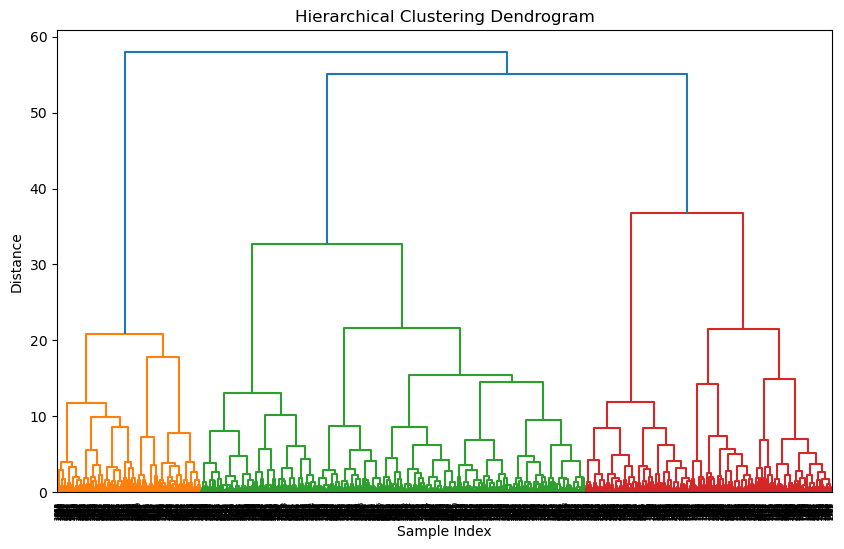

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform

# Generate some sample data (replace this with your own data)
np.random.seed(0)
# X = np.random.rand(100, 3)  # 3D data
X = data_pca
# X = loaded_array
# X= data_tsne

# Perform hierarchical clustering
distance_matrix = squareform(pdist(X))  # Calculate pairwise distances
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0.4, linkage='ward')
agglomerative.fit(X)

# Visualize the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglomerative)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [105]:
desired_level = 300  # Change this to the level you want
cluster_labels=agglomerative.labels_
# Get the indices of instances at the specified level
same_level_indices = np.where(cluster_labels == desired_level)[0]

print("Indices at the same level:", same_level_indices)
for index in same_level_indices:
    print(content[index])
    print()

Indices at the same level: [ 295  498 1934]
Phân tích và nhận định tiềm năng của đất nền, ông Nguyễn Văn Khôi - Chủ tịch Hiệp hội BĐS Việt Nam cho rằng, đất nền tại các khu đô thị cũ của các thành phố lớn giai đoạn 2023-2025 dự báo không có đột biến lớn cả về giá cả và lượng giao dịch, do quỹ đất ngày càng hạn hẹp, các vị trí đắc địa ngày càng ít, giá trị sinh lời thấp.

Bộ Xây dựng cho biết, thị trường bất động sản, doanh nghiệp bất động sản thời gian qua đã gặp khó khăn do chịu ảnh hưởng của nhiều yếu tố bất lợi cả trong lẫn ngoài nước, với nhiều nguyên nhân, trong đó có nguyên nhân do dòng tiền, tiếp cận nguồn vốn khó khăn và thanh khoản của thị trường suy giảm. Vì vậy, để kịp thời tháo gỡ, Chính phủ, Thủ tướng Chính phủ trên cơ sở các báo cáo tham mưu, đề xuất của Bộ Xây dựng và Bộ, ngành liên quan đã ban hành nhiều chỉ đạo giải quyết, với biện pháp rất quyết liệt, nhằm tháo gỡ khó khăn, vướng mắc cho thị trường bất động sản, doanh nghiệp bất động sản. Cụ thể như Quyết định số 1435

In [84]:
# desired_cluster_label = 300  # Change this to the label you want to target

desired_distance_threshold = 0.2

# Get the indices of instances at the same level (similar instances)
similar_instance_indices = np.where(distance_matrix < desired_distance_threshold)[0]


for index in similar_instance_indices:
    print(content[index])
    print()

Các vụ vỡ nợ trái phiếu doanh nghiệp đang tăng ở Thái Lan. Ngân hàng Trung ương tăng lãi suất đã làm tăng chi phí tài chính của doanh nghiệp và gây khó khăn cho một số tổ chức phát hành trong việc đảm bảo số tiền họ cần để trả nợ. Các tổ chức phát hành trái phiếu cũng đang gặp khó khăn bởi sự thận trọng ngày càng tăng của các nhà đầu tư đối với việc mua trái phiếu không được đảm bảo bằng tài sản thế chấp. Ông Kasem Prunratanamala, trưởng bộ phận nghiên cứu của CGS-CIMB Securities (Thái Lan), phát biểu: “Các vụ vỡ nợ trái phiếu gần đây của nhiều doanh nghiệp đã làm giảm lòng tin trên thị trường, dẫn đến giá trị giao dịch trái phiếu giảm”. Theo hiệp hội Thị trường Trái phiếu Thái Lan, 7 công ty niêm yết đã trễ thời hạn mua lại tính đến ngày 31/8. Tổng số nợ của 7 công ty này là 19 tỷ baht. Con số này nhiều hơn 6 vụ vỡ nợ với tổng trị giá 13,5 tỷ baht xảy ra trong giai đoạn 2016 - 2022.

Các vụ vỡ nợ trái phiếu doanh nghiệp đang tăng ở Thái Lan. Ngân hàng Trung ương tăng lãi suất đã làm t

In [157]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import pdist, squareform



kmeans_labels = kmeans.labels_

# agg_labels = agglomerative.labels_

# Evaluate K-means clustering using Silhouette Score and ARI
kmeans_silhouette = silhouette_score(X, kmeans_labels)
# kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)  # Replace true_labels with actual labels if available

# Evaluate Agglomerative clustering using Silhouette Score and ARI
# agg_silhouette = silhouette_score(X, agg_labels)
# agg_ari = adjusted_rand_score(true_labels, agg_labels)  # Replace true_labels with actual labels if available

print("K-means Silhouette Score:", kmeans_silhouette)
# print("K-means Adjusted Rand Index (ARI):", kmeans_ari)
# print("\nAgglomerative Silhouette Score:", agg_silhouette)
# print("Agglomerative Adjusted Rand Index (ARI):", agg_ari)


K-means Silhouette Score: 0.2882266


In [221]:
from sklearn.decomposition import TruncatedSVD

import numpy as np
from sklearn.cluster import KMeans

# num_topics = 3  # Choose the number of topics (latent dimensions)
# lsa = TruncatedSVD(n_components=num_topics)
# data_lsa = lsa.fit_transform(loaded_array)
# Generate some sample data (replace this with your own data)
# X = data_pca  # 3D data
X = data_tsne  # 2D data
# X = data_lsa
# Specify the number of clusters (you should choose an appropriate value)
n_clusters = 10

# Create a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fit the KMeans model to the data
# kmeans.fit(X)
kmeans_labels = kmeans.fit_predict(X)

# kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print("K-means Silhouette Score:", kmeans_silhouette)
unique_labels = np.unique(kmeans_labels)
clusters = []
for label in unique_labels:
    # Find indices of data points belonging to the current cluster
    cluster_indices = np.where(kmeans_labels == label)[0]
    clusters.append(list(cluster_indices))

# Loop through the first cluster's indices
no_clusters = 2
print("Cluster:", no_clusters)
for index in clusters[no_clusters-1]:
    print(content[index])
    print()
cluster_labels = kmeans.labels_

# Summarize each cluster
from sklearn.feature_extraction.text import TfidfVectorizer
for cluster_id in range(n_clusters):
    # Find data points in the current cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    # Extract TF-IDF scores for the current cluster
    cluster_tfidf = X[cluster_indices]
    
    # Find the most significant terms (top features)
    top_features = np.argsort(-cluster_tfidf.sum(axis=0)).flatten()[:10]  # Adjust the number of top features as needed
    
    # Print cluster summary
    print(f"Cluster {cluster_id} Summary:")
    print("Top Features:")
    for feature_idx in top_features:
        print(vectorizer.get_feature_names()[feature_idx])
    print("\nSample Data Points:")
    for data_idx in cluster_indices[:3]:  # Print the first 3 data points as samples
        print(documents[data_idx])
    print("\n")





K-means Silhouette Score: 0.28845438
Cluster: 2
Một số nhà phân tích cho rằng các tập đoàn giờ đây sẽ phải huy động vốn bằng cách vay ngân hàng. Họ cũng sẽ phải gánh chi phí tài chính cao hơn khi lãi suất ngày càng tăng.

Giám đốc chi nhánh của một ngân hàng quốc doanh tại Hà Nội cho biết, sau hơn nửa tháng triển khai, chi nhánh chưa phát sinh hồ sơ nào trong diện này. Ngoài việc khách hàng cần làm đơn yêu cầu trả nợ trước hạn tại ngân hàng cũ, thủ tục cho vay sẽ tương tự như giải ngân khoản vay mới... Chuyên gia Nguyễn Trí Hiếu cho rằng, với chính sách này, lãi suất cho vay có thể giảm nhưng không đáng kể. Khách hàng cũng không dễ dàng đảo nợ vì thủ tục và điều kiện để giải ngân khoản vay mới không hẳn dễ dàng.

Chị Nguyễn Minh Tâm (Hoàng Mai, Hà Nội) chia sẻ, hai năm trước, chị mua bất động sản thuộc một dự án tại Hưng Yên và được chủ đầu tư chỉ định vay 2 tỷ đồng qua ngân hàng đối tác. Năm đầu tiên, chị được hưởng ưu đãi lãi suất và ân hạn trả nợ gốc nên áp lực trả nợ không đáng kể.

K-means Silhouette Score: 0.35373868469882447
Cluster: 2


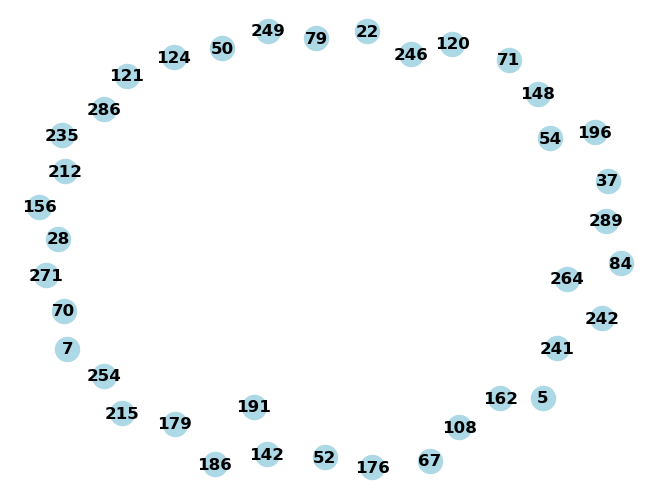

In [220]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import networkx as nx
import matplotlib.pyplot as plt

# Load your data and perform dimensionality reduction (e.g., t-SNE)
# X = data_tsne  # 2D data (you can use the result of t-SNE)

# Specify the number of clusters (you should choose an appropriate value)
n_clusters = 10

# Create a KMeans instance
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the KMeans model to the data
kmeans_labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print("K-means Silhouette Score:", kmeans_silhouette)

# Create a list of clusters with data point indices
unique_labels = np.unique(kmeans_labels)
clusters = []
for label in unique_labels:
    # Find indices of data points belonging to the current cluster
    cluster_indices = np.where(kmeans_labels == label)[0]
    clusters.append(list(cluster_indices))

# Define a function to create and visualize the knowledge graph for a cluster
def visualize_cluster_graph(cluster_data):
    # Create a graph for the cluster
    cluster_graph = nx.Graph()

    # Add nodes (data points) to the graph
    for index in cluster_data:
        cluster_graph.add_node(index)

    # Add edges based on your defined relationships (similarity, etc.)
    # You can use a similarity measure or other criteria to establish edges

    # Visualize the graph (customize visualization as needed)
    pos = nx.spring_layout(cluster_graph)
    nx.draw(cluster_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold')
    plt.show()

# Choose the cluster number you want to visualize
no_clusters = 2

# Visualize the knowledge graph for the selected cluster
print("Cluster:", no_clusters)
visualize_cluster_graph(clusters[no_clusters - 1])

# Summarize the topics or content of the selected cluster
# Implement topic modeling or term frequency analysis here if needed
